In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import emoji
import contractions
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import pandas as pd
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import math
from collections import Counter

#% matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Okti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Okti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Okti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('tweet_data.csv')
print('Number of tweets: {}'.format(len(df)))

Number of tweets: 18727


Preprocessing tweet

In [3]:
tweet = "RT @ANDRZEJ Let me die! looooool 👍 https://pjwstk.edu.pl #KNO #Fun"

In [4]:
#Remove retweet
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet
print("Processed tweet: {}".format(replace_retweet(tweet)))

Processed tweet: @ANDRZEJ Let me die! looooool 👍 https://pjwstk.edu.pl #KNO #Fun


In [5]:
#Delete user tag
def replace_user(tweet, default_replace="twitteruser"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet
print("Processed tweet: {}".format(replace_user(tweet)))

Processed tweet: RT twitteruser Let me die! looooool 👍 https://pjwstk.edu.pl #KNO #Fun


In [6]:
#Replace emoji with text
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet
print("Processed tweet: {}".format(demojize(tweet)))

Processed tweet: RT @ANDRZEJ Let me die! looooool :thumbs_up: https://pjwstk.edu.pl #KNO #Fun


In [7]:
#Get rid of links
def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet
print("Processed tweet: {}".format(replace_url(tweet)))

Processed tweet: RT @ANDRZEJ Let me die! looooool 👍  #KNO #Fun


In [8]:
#Get rid of hashtags
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet
print("Processed tweet: {}".format(replace_hashtag(tweet)))

Processed tweet: RT @ANDRZEJ Let me die! looooool 👍 https://pjwstk.edu.pl KNO Fun


In [9]:
#Remove capitalization
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet
print("Processed tweet: {}".format(to_lowercase(tweet)))

Processed tweet: rt @andrzej let me die! looooool 👍 https://pjwstk.edu.pl #kno #fun


In [10]:
#Remove repetition
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet
print("Processed tweet: {}".format(word_repetition(tweet)))

Processed tweet: RT @ANDRZEJ Let me die! lool 👍 https://pjwstk.edu.pl #KNO #Fun


In [11]:
#Remove punctuation repetition
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet
print("Processed tweet: {}".format(punct_repetition(tweet)))

Processed tweet: RT @ANDRZEJ Let me die! looooool 👍 https://pjwstk.edu.pl #KNO #Fun


In [12]:
#Tokenization
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens
print(type(tokenize(tweet)))
print("Tweet tokens: {}".format(tokenize(tweet)))

<class 'list'>
Tweet tokens: ['RT', '@', 'ANDRZEJ', 'Let', 'me', 'die', '!', 'looooool', '👍', 'https', ':', '//pjwstk.edu.pl', '#', 'KNO', '#', 'Fun']


In [13]:
def _fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
    tweet = tweet.replace(k, v)
  return tweet
print("Processed tweet: {}".format(_fix_contractions(tweet)))

Processed tweet: RT @ANDRZEJ Let me die! looooool 👍 https://pjwstk.edu.pl #KNO #Fun


In [14]:
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet
print("Processed tweet: {}".format(fix_contractions(tweet)))

Processed tweet: RT @ANDRZEJ Let me die! looooool 👍 https://pjwstk.edu.pl #KNO #Fun


In [15]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'an', "you'd", 'where', 'again', 'own', 'too', "that'll", 'you', 'ain', "shan't", 'aren', 'shouldn', "hasn't", 'out', 'why', 'between', "wouldn't", 'is', 's', 'further', 'each', 'to', 'in', 'don', 'before', "weren't", 'once', 'won', 'some', 'him', 'or', "doesn't", 'such', 'he', 'o', "shouldn't", 'your', 'will', 'y', "it's", 'we', 'are', 'ma', 'was', 'very', 'mustn', 'm', 'with', "you've", 'most', 'both', 'her', 'she', 'during', 't', 'only', 'nor', 'been', 'below', 'than', 'isn', 'haven', "should've", 'hadn', 'me', 'himself', 'which', 'shan', 'up', 're', 'hasn', "she's", 'd', 'into', 'my', "you'll", 'on', "don't", 'under', 'didn', 'that', 'the', 'weren', "mightn't", 'who', "didn't", "isn't", 'this', 'more', 'ourselves', 'against', 'yours', 'how', 'were', 'from', 'whom', 'because', 'there', 'wouldn', 'has', "needn't", 'no', 'wasn', 'above', 'themselves', 'other', 'needn', 'by', 'i', 'but', "hadn't", 'hers', "wasn't", 'should', "mustn't", "you're", 'yourself', 'ours', 'myself', 'few', 'h

In [16]:
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  
  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]
  
  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

print("Tweet tokens: {}".format(custom_tokenize(tweet, 
                                                keep_punct=True, 
                                                keep_alnum=True, 
                                                keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

Tweet tokens: ['RT', '@', 'ANDRZEJ', 'Let', 'me', 'die', '!', 'looooool', '👍', 'https', ':', '//pjwstk.edu.pl', '#', 'KNO', '#', 'Fun']
Tweet tokens: ['RT', 'ANDRZEJ', 'Let', 'me', 'die', 'looooool', 'https', 'KNO', 'Fun']
Tweet tokens: ['RT', 'ANDRZEJ', 'Let', 'die', 'looooool', '👍', 'https', '//pjwstk.edu.pl', 'KNO', 'Fun']


In [17]:
tokens = ["manager", "management", "managing"]
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snoball_stemmer = SnowballStemmer('english')

In [18]:
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


In [19]:
#Lemmatization
tokens = ["international", "companies", "had", "interns"]
word_type = {"international": wordnet.ADJ, 
             "companies": wordnet.NOUN, 
             "had": wordnet.VERB, 
             "interns": wordnet.NOUN
             }
lemmatizer = WordNetLemmatizer()

In [20]:
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


In [21]:
complex_tweet = r"""RT @ADNDRZEJ COMPLEX TEST, 
THis is a big and complex TWeet!!! 👍 ... 
We'd be glad if you couldn't normalize it! 
Check https://yhamster.eu and LET ME KNOW!!! #DIE #BYE"""

In [22]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem
print(process_tweet(complex_tweet, verbose=False))

['complex', 'test', 'big', 'complex', 'tweet', 'would', 'glad', 'could', 'not', 'normal', 'check', 'let', 'know', 'die', 'bye']


In [23]:
#Processing tweets
for i in range(5):
  tweet_id = random.randint(0,len(df))
  tweet = df.iloc[tweet_id]["tweet_text"]
  print(process_tweet(tweet, verbose=True))
  print("\n")

Initial tweet: Hahhahah I'm watching the greatest movie ever
Post Twitter processing tweet: Hahhahah I'm watching the greatest movie ever
Post Word processing tweet: hahhahah i am watching the greatest movie ever
['hahhahah', 'watch', 'greatest', 'movi', 'ever']


Initial tweet: @Kohmahts be clear, I am Catholic, but wholeheartedly agree with you.  (&quot;Same here&quot; was ambiguous) #tcot #hhrs
Post Twitter processing tweet:  be clear, I am Catholic, but wholeheartedly agree with you.  (&quot;Same here&quot; was ambiguous) tcot hhrs
Post Word processing tweet:  be clear, i am catholic, but wholeheartedly agree with you.  (&quot;same here&quot; was ambiguous) tcot hhrs
['clear', 'cathol', 'wholeheart', 'agre', 'quot', 'quot', 'ambigu', 'tcot', 'hhrs']


Initial tweet: @stefanz i have a weird subconscience. i wonder who will i dream next
Post Twitter processing tweet:  i have a weird subconscience. i wonder who will i dream next
Post Word processing tweet:  i have a weird subconscienc

In [24]:
#Processing CSV file
df["tokens"] = df["tweet_text"].apply(process_tweet)
df["tweet_sentiment"] = df["sentiment"].apply(lambda i: 1
                                              if i == "positive" else 0)
df.head(10)

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, call]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[funer, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, soon]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[not, go, prom, bf, not, like, friend]",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hmm],0
5,1956969035,@charviray Charlene my love. I miss you,negative,"[charlen, love, miss]",0
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative,"[sorri, least, friday]",0
7,1956969531,Choked on her retainers,negative,"[choke, retain]",0
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative,"[ugh, beat, stupid, song, get, next, rude]",0
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative,"[watch, hill, london, realis, tourtur, week, w...",0


In [25]:
# Tweet and sentiment
X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()
#print(X)
#print(y)

In [26]:
#Count positive negative freq
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
          ["i", "love", "you"],
          ["you", "are", "happy", "to", "learn"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

sentiment = [1, 0, 1, 1, 0, 0]

In [27]:
def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs
freqs = build_freqs(corpus, sentiment)
print(freqs)

{('i', 1): 2, ('love', 1): 2, ('nlp', 1): 1, ('i', 0): 3, ('miss', 0): 1, ('you', 0): 1, ('you', 1): 2, ('are', 1): 1, ('happy', 1): 1, ('to', 1): 1, ('learn', 1): 1, ('lost', 0): 1, ('my', 0): 1, ('computer', 0): 1, ('am', 0): 1, ('so', 0): 1, ('sad', 0): 1}


In [28]:
#Counting Frequency dictionary of entire dataset
freqs_all = build_freqs(X, y)
print("Frequency of word 'love' in + tweets: {}".format(freqs_all[("love", 1)]))
print("Frequency of word 'love' in - tweets: {}".format(freqs_all[("love", 0)]))

Frequency of word 'love' in + tweets: 1358
Frequency of word 'love' in - tweets: 67


In [29]:
#Counting 2D vectors of tweets frequency
def tweet_to_freq(tweet, freqs):
  x = np.zeros((2,))
  for word in tweet:
    if (word, 1) in freqs:
      x[0] += freqs[(word, 1)]
    if (word, 0) in freqs:
      x[1] += freqs[(word, 0)]
  return x
print(tweet_to_freq(["i", "love", "nlp"], freqs))
print(tweet_to_freq(["i", "love", "nlp"], freqs_all))

[5. 3.]
[1358.   67.]


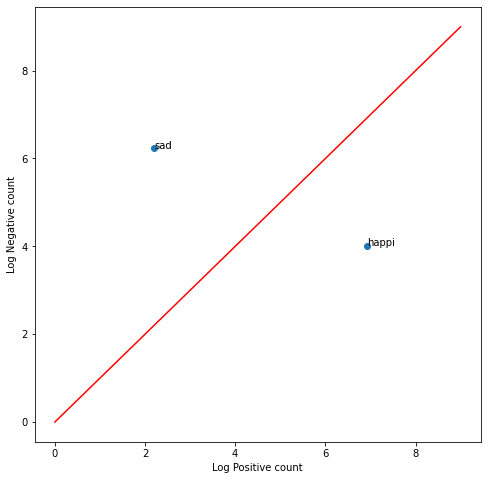

In [30]:
#Ploting vectors of chosen tags
fig, ax = plt.subplots(figsize = (8, 8))

word1 = "happi"
word2 = "sad"

def word_features(word, freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)  

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0, 9], [0, 9], color = 'red')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

In [31]:
#Bag of words
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect
cv_vect = fit_cv(corpus)
ft = cv_vect.get_feature_names()
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am', 'computer', 'happy', 'hate', 'i', 'lost', 'love', 'miss', 'my', 'nlp', 'sad', 'so', 'you']


E:\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
#Convert corpus to a matrix
cv_mtx = cv_vect.transform(corpus)
print("Matrix shape is: {}".format(cv_mtx.shape))
cv_mtx.toarray()

Matrix shape is: (6, 13)


array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]], dtype=int64)

In [33]:
#Test
new_tweet = [["lost", "lost", "miss", "miss"]]
cv_vect.transform(new_tweet).toarray()

array([[0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]], dtype=int64)

In [34]:
#TF-IDF
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

In [35]:
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect
tf_vect = fit_tfidf(corpus)
tf_mtx = tf_vect.transform(corpus)
ft = tf_vect.get_feature_names()
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am', 'computer', 'happy', 'hate', 'i', 'lost', 'love', 'miss', 'my', 'nlp', 'sad', 'so', 'you']


In [36]:
print(tf_mtx.shape)
tf_mtx.toarray()

(6, 13)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.56921261, 0.        , 0.        , 0.82219037,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.        , 0.96260755, 0.        ,
        0.        , 0.27089981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68172171, 0.55902156, 0.        ,
        0.        , 0.47196441, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.52182349, 0.        , 0.        , 0.42790272,
        0.52182349, 0.        , 0.        , 0.52182349, 0.        ,
        0.        , 0.        , 0.        ],
       [0.52182349, 0.        , 0.        , 0.        , 0.42790272,
        0.        , 0.     

In [37]:
#Building AI model
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    train_size=0.80)
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

Size of X_train: 14981
Size of y_train: 14981


Size of X_test: 3746
Size of y_test: 3746


Train proportion: 80%


In [39]:
#Random print
id = random.randint(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Sentiment: {}".format(y_train[id]))

Train tweet: ['want', 'see', 'mama', 'not', 'call', 'back', 'yet']
Sentiment: 0


In [40]:
#Logistic regr 
def fit_lr(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  return model

In [41]:
freqs = build_freqs(X_train, y_train)
X_train_pn = [tweet_to_freq(tweet, freqs) for tweet in X_train]
X_test_pn = [tweet_to_freq(tweet, freqs) for tweet in X_test]
model_lr_pn = fit_lr(X_train_pn, y_train)
print(model_lr_pn.coef_, model_lr_pn.intercept_)

[[ 0.00264615 -0.00194929]] [-0.55956082]


In [42]:
#Bag of words vectorizer
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)
model_lr_cv = fit_lr(X_train_cv, y_train)

tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

model_lr_tf = fit_lr(X_train_tf, y_train)

E:\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


LR Model Accuracy: 77.92%


<module 'seaborn' from 'E:\\anaconda\\lib\\site-packages\\seaborn\\__init__.py'>

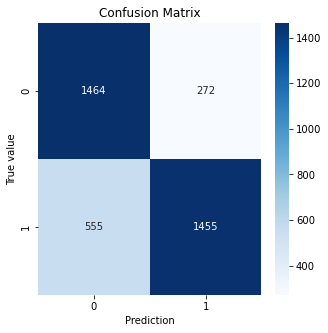

In [43]:
#Using model to predict neg/pos freq
y_pred_lr_pn = model_lr_pn.predict(X_test_pn)
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_pn)))
plot_confusion(confusion_matrix(y_test, y_pred_lr_pn))

LR Model Accuracy: 88.52%


<module 'seaborn' from 'E:\\anaconda\\lib\\site-packages\\seaborn\\__init__.py'>

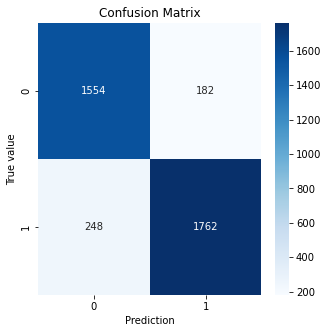

In [44]:
#Predicting by count vector
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

LR Model Accuracy: 88.65%


<module 'seaborn' from 'E:\\anaconda\\lib\\site-packages\\seaborn\\__init__.py'>

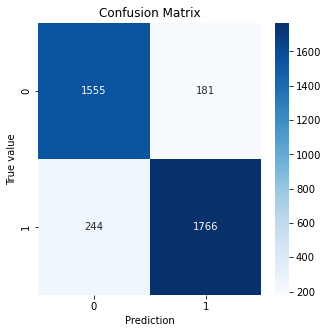

In [45]:
#TF-IDF accuracy
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

In [46]:
#Predicting tweet
def predict_tweet(tweet):
  processed_tweet = process_tweet(tweet)
  transformed_tweet = tf.transform([processed_tweet])
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction == 1:
    return "Prediction is positive sentiment"
  else:
    return "Prediction is negative sentiment"

In [47]:
your_tweet = """Life sucks then you die, i want to die"""
predict_tweet(your_tweet)

'Prediction is negative sentiment'

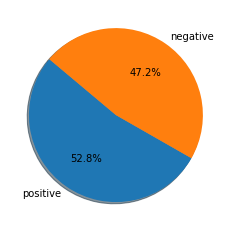

In [48]:
sentiment_count = df["sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

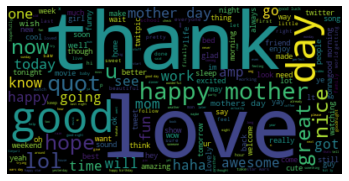

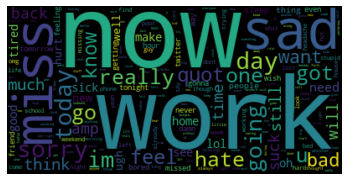

In [49]:
pos_tweets = df[df["sentiment"]=="positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

neg_tweets = df[df["sentiment"]=="negative"]
txt = " ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [50]:
##################EXAMPLE FOR FILE DOWNLOAD#####################

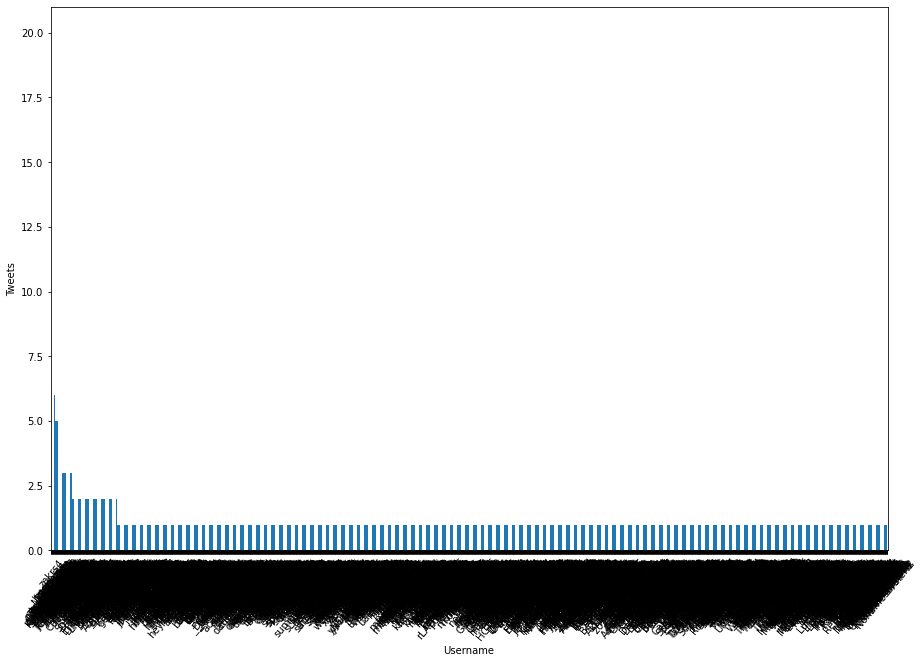

In [51]:
df = pd.read_csv("christmas.csv", index_col=0)
df.head()

df[["Text", "Username",]].head()
country = df.groupby("Username")
country.describe().head()

plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Username")
plt.ylabel("Tweets")
plt.show()

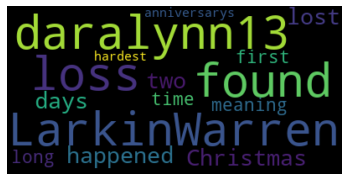

In [52]:
text = df.Text[0]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [53]:
text = " ".join(review for review in df.Text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 388139 words in the combination of all review.


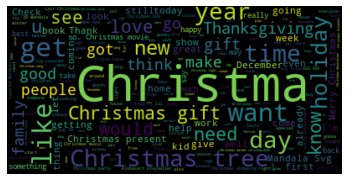

In [54]:
#stopwords = set(STOPWORDS)
stop_words.update(["https", "amp","one","co"])
wordcloud = WordCloud(stopwords=stop_words, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
print(df.Text[0])
tweet = df.Text[0]
predict_tweet(tweet)

@LarkinWarren @daralynn13 I found the same. My loss happened two days after Christmas, so it lost its meaning for a long time. All the first anniversarys were the hardest.


'Prediction is negative sentiment'

In [56]:
positive = ""
negative = ""
for i in range(len(df)):
    tweet = df.Text[i]
    if predict_tweet(tweet) == "Prediction is positive sentiment":
        positive += tweet
    else:
        negative += tweet

In [59]:
print("number of negatives= ", len(negative))
print("number of positives= ", len(positive))

number of negatives=  168167
number of positives=  216972


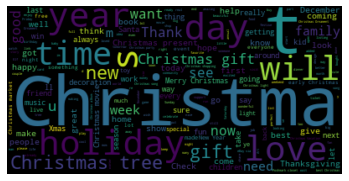

In [60]:
stopwords = set(STOPWORDS)
stopwords.update(["https", "amp","one","co"])
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(positive)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

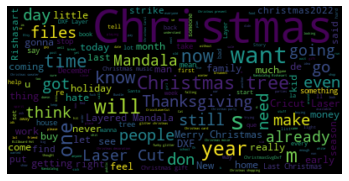

In [61]:
stopwords = set(STOPWORDS)
stopwords.update(["https", "amp","3D","SVG","t","CO","EtsySeller",])
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(negative)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [62]:
WORD = re.compile(r"\w+")

def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)


text1 = positive
text2 = negative

vector1 = text_to_vector(text1)
vector2 = text_to_vector(text2)

cosine = get_cosine(vector1, vector2)

print("Cosine:", cosine)

Cosine: 0.9800518558495962


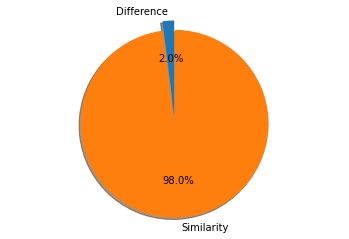

In [63]:
labels = 'Difference', 'Similarity'
sizes = [1 - cosine, cosine]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()